<a href="https://colab.research.google.com/github/jessifebria/Decision-Tree-and-Visualization-McD-dataset/blob/main/DTree_and_Visualization_mcd_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.cluster import KMeans

# Load dataset dari google drive 
mcd = pd.read_csv('/content/drive/My Drive/menu.csv')

# Cek apakah ada missing value
mcd.isna().sum(axis = 0)

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

In [ ]:
mcd.head(5)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


In [ ]:
# List Attribute
list(mcd.columns.values)

['Category',
 'Item',
 'Serving Size',
 'Calories',
 'Calories from Fat',
 'Total Fat',
 'Total Fat (% Daily Value)',
 'Saturated Fat',
 'Saturated Fat (% Daily Value)',
 'Trans Fat',
 'Cholesterol',
 'Cholesterol (% Daily Value)',
 'Sodium',
 'Sodium (% Daily Value)',
 'Carbohydrates',
 'Carbohydrates (% Daily Value)',
 'Dietary Fiber',
 'Dietary Fiber (% Daily Value)',
 'Sugars',
 'Protein',
 'Vitamin A (% Daily Value)',
 'Vitamin C (% Daily Value)',
 'Calcium (% Daily Value)',
 'Iron (% Daily Value)']

In [ ]:
# List Category
category = mcd['Category'].unique()
list(category)

['Breakfast',
 'Beef & Pork',
 'Chicken & Fish',
 'Salads',
 'Snacks & Sides',
 'Desserts',
 'Beverages',
 'Coffee & Tea',
 'Smoothies & Shakes']

In [ ]:
# Jumlah item di tiap Category
mcd['Category'].value_counts()

Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Beverages             27
Chicken & Fish        27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Category, dtype: int64

In [ ]:
# Decision tree dengan 2 attribute : Vitamin A & Vitamin C

x=mcd[['Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)']]
y=mcd['Category']
category = mcd['Category'].unique()
model = tree.DecisionTreeClassifier()
model.fit(x,y)


tree.export_graphviz(model, out_file='/content/drive/My Drive/mcd_dtree3.dot',
                    feature_names = ['VitaminA', 'VitaminC'],
                    class_names = category,
                    rounded= True,
                    filled =True
                    )



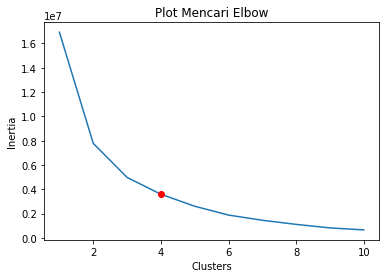

Hasil K-Means dengan 4 Clusters


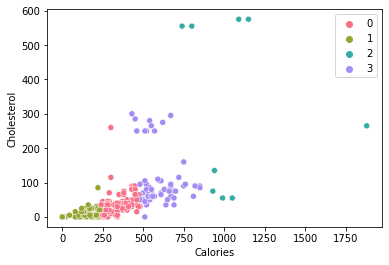

In [ ]:
# Clustering dengan K-Means

data=pd.get_dummies(mcd)
df = data[['Calories', 'Cholesterol']]

inersia=[]

# Mencari Elbow
for i in range(1,11):
  cluster=KMeans(n_clusters=i).fit(df)
  inersia.append(cluster.inertia_)
   
plt.plot(list(range(1,11)),inersia)
plt.plot(4,inersia[3],'ro') 
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.title("Plot Mencari Elbow")
plt.show()

# Menentukan k=4 dari Elbow, dan memulai clustering
hasil=KMeans(n_clusters=4).fit(df)
print("Hasil K-Means dengan",4, "Clusters")
sns.scatterplot(x=data['Calories'],y=data["Cholesterol"], hue=hasil.labels_ , palette=sns.color_palette('husl',4))
plt.show() 

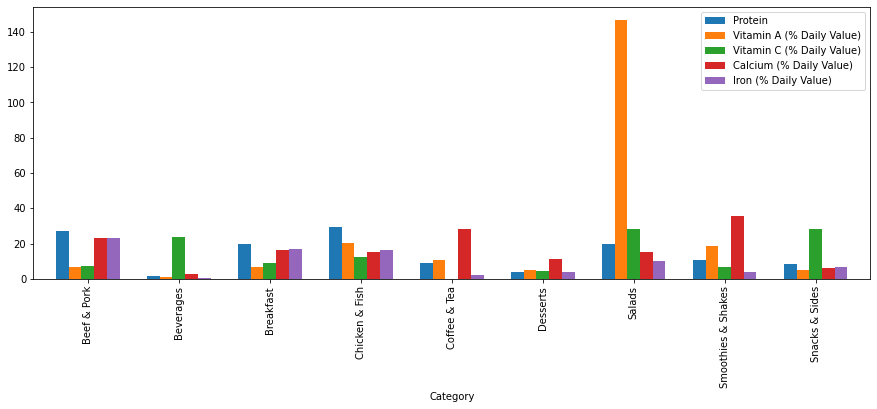

In [ ]:
# Visualisasi Data (Top Vitamin)

rcParams['figure.figsize'] = 15, 5
data = mcd[['Category','Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)','Calcium (% Daily Value)','Iron (% Daily Value)']]
data.groupby(['Category']).mean().plot(kind='bar', legend=True, width=0.7)


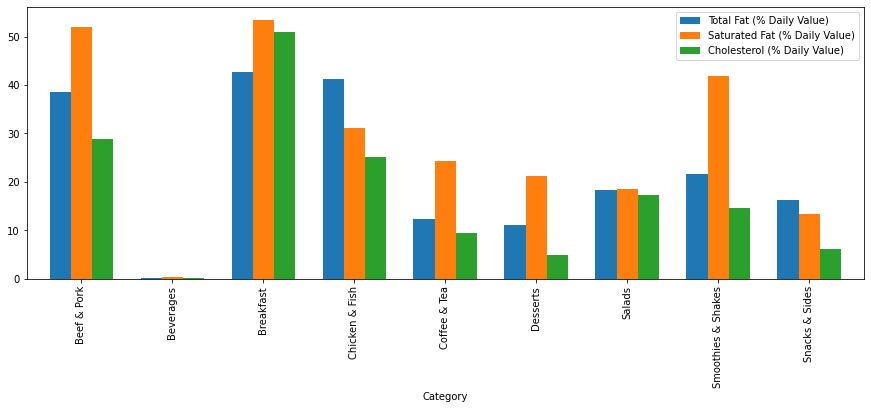

In [ ]:
# Visualisasi Data (Top Attribure Jahat)

rcParams['figure.figsize'] = 15, 5
data2 = mcd[['Category','Total Fat (% Daily Value)','Saturated Fat (% Daily Value)','Cholesterol (% Daily Value)',]]
data2.groupby(['Category']).mean().plot(kind='bar', legend=True, width=0.7)

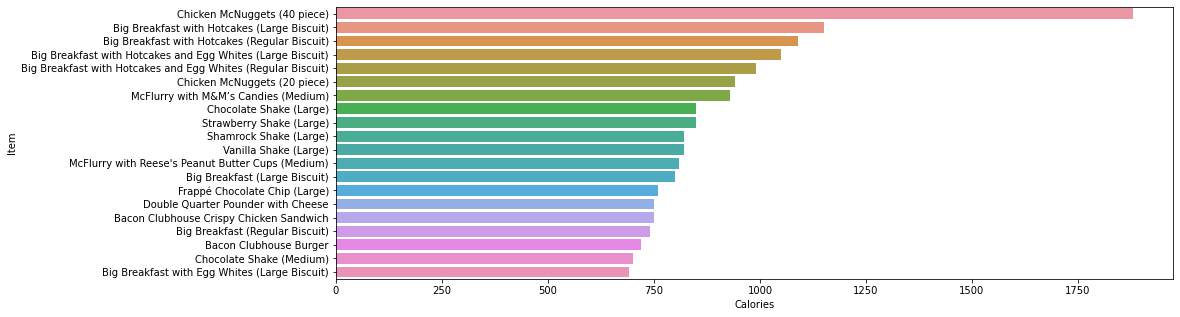

In [ ]:
# Visualisasi Data (20 Item dengan Calories tertinggi)

topcalories = mcd[['Item','Calories']].sort_values('Calories',ascending=False).reset_index()[:20]

sns.barplot(x= 'Calories' ,y='Item',data=topcalories,dodge=False, orient= "h")


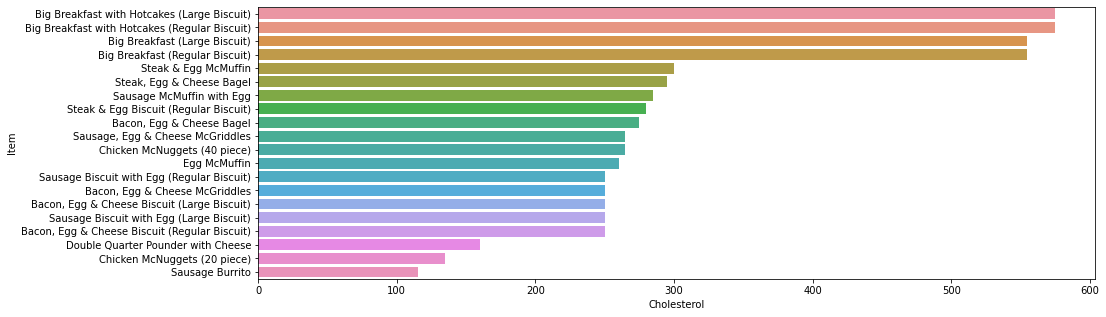

In [ ]:
# Visualisasi Data (20 Item dengan Cholesterol tertinggi)

topcholesterol = mcd[['Item','Cholesterol']].sort_values('Cholesterol',ascending=False).reset_index()[:20]

sns.barplot(x= 'Cholesterol' ,y='Item',data=topcholesterol,dodge=False, orient= "h")


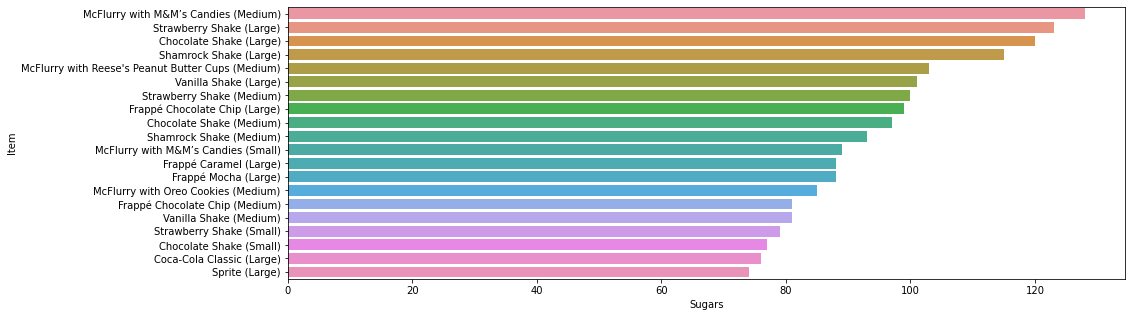

In [ ]:
# Visualisasi Data (20 Item dengan Sugar tertinggi)

topsugar = mcd[['Item','Sugars']].sort_values('Sugars',ascending=False).reset_index()[:20]

sns.barplot(x= 'Sugars' ,y='Item',data=topsugar,dodge=False, orient= "h")


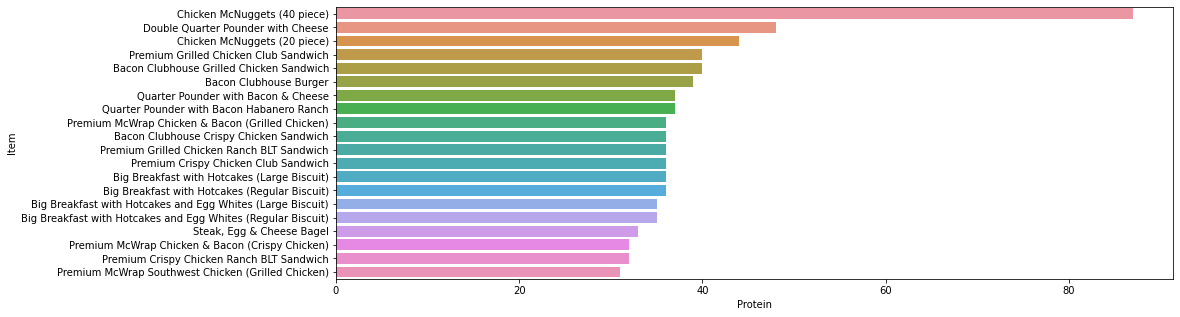

In [ ]:
# Visualisasi Data (20 Item dengan Protein tertinggi)

topprotein = mcd[['Item','Protein']].sort_values('Protein',ascending=False).reset_index()[:20]

sns.barplot(x= 'Protein' ,y='Item',data=topprotein,dodge=False, orient= "h")


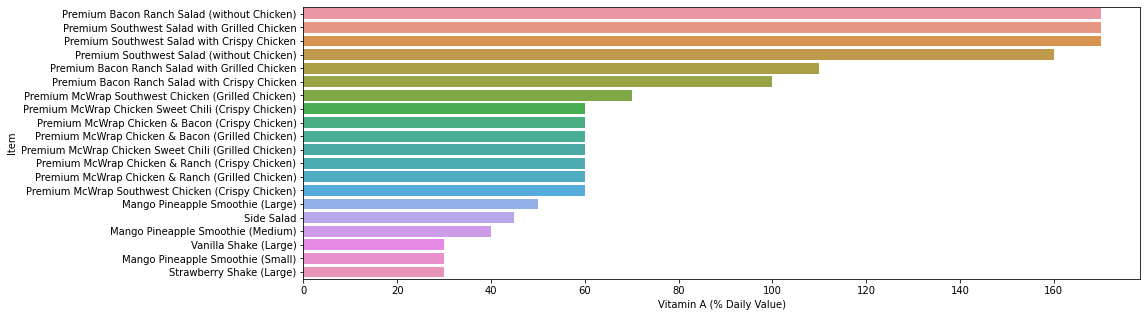

In [ ]:
# Visualisasi Data (20 Item dengan Vitamin A tertinggi)

topvita = mcd[['Item','Vitamin A (% Daily Value)']].sort_values('Vitamin A (% Daily Value)',ascending=False).reset_index()[:20]

sns.barplot(x= 'Vitamin A (% Daily Value)' ,y='Item',data=topvita,dodge=False, orient= "h")


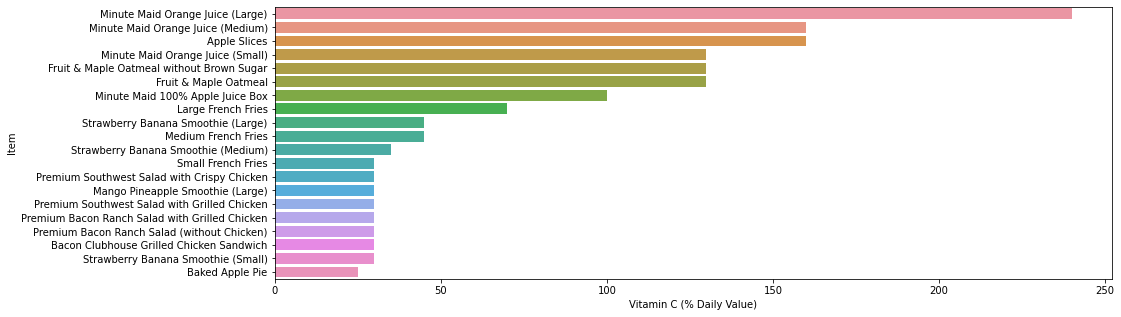

In [ ]:
# Visualisasi Data (20 Item dengan Vitamin C tertinggi)

topvitc = mcd[['Item','Vitamin C (% Daily Value)']].sort_values('Vitamin C (% Daily Value)',ascending=False).reset_index()[:20]

sns.barplot(x= 'Vitamin C (% Daily Value)' ,y='Item',data=topvitc,dodge=False, orient= "h")
